# Overwrite Content with CSV

This script utilizes <code>pyodbc</code> and <code>pandas</code> dataframes to 
<ol>
    <li>Read in data from a SQL Database,</li>
    <li>Export pandas dataframe into a CSV file, and</li>
    <li>Overwrite service in ArcGIS Online.</li>
</ol>

**Note:** This lesson requires the setup of a databse (SQL Server recommended).

-----

**Directions:** Begin by importing the necessary libraries and providing password.
<ul>
    <li><code>pyodbc</code> connects to a database. (GitHub: <a href="https://github.com/mkleehammer/pyodbc" target="_new">https://github.com/mkleehammer/pyodbc)</a></li>
    <li><code>pandas</code> is a common toolkit for data science. It contains <code>dataframes</code> which are flexible data structures used for data manipulation and analysis.</li>
    <li><code>getpass</code> for obtaining a passcode securely.</li>
    <li><code>arcgis</code> for importing gis portal libraries.</li>
</ul>

In [1]:
# Import libraries
import pyodbc
import pandas as pd
import getpass
from arcgis.gis import GIS
from arcgis import features

In [2]:
password = getpass.getpass()

········


**Directions:** Provide SQL database connection using <code>pyodbc.connect()</code>. Establish output CSV location for data export. Query the field's agency, agency_name, bbl, borough, latitude, longitude from the 311 database (not SDE). Create a dataframe from the query using the established SQL database connection according to specified dataframe field names, and return a preview.

Runrun through the entire script and use  
1. query = "SELECT agency, agency_name, bbl, borough, latitude, longitude  from SDE.NYC_311_nosde" 
2. df.columns = ['Agency', 'Agency_name', 'bbl', 'Borough', 'Latitude', 'Longitude'] 
3. In [27] => notice how the rest of the outputs show "yvalue, xvalue" we want it to show Latitude & Longitude

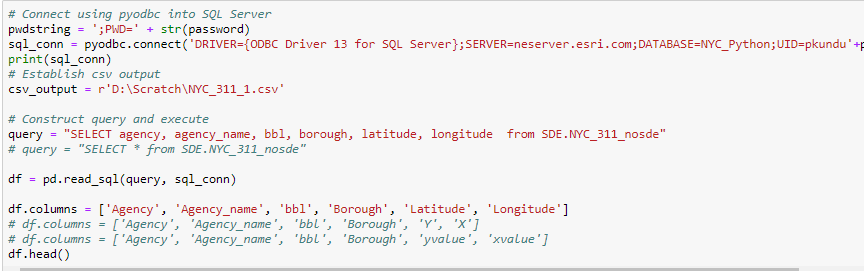

4. This ensures the output is mapped correctly. 

<b>Note:</b> Ensure all inputs are updated for specific machine.

In [27]:
# Connect using pyodbc into SQL Server
pwdstring = ';PWD=' + str(password)
sql_conn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER=neserver.esri.com;DATABASE=NYC_Python;UID=sde'+pwdstring)
print(sql_conn)

# Establish csv output
csv_output = r'D:\Scratch\NYC_311.csv'

# Construct query and execute
query = "SELECT agency, agency_name, bbl, borough, latitude, longitude  from SDE.NYC_311_nosde"

df = pd.read_sql(query, sql_conn)

df.columns = ['Agency', 'Agency_name', 'bbl', 'Borough', 'Latitude', 'Longitude']
# df.columns = ['Agency', 'Agency_name', 'bbl', 'Borough', 'Y', 'X']
# df.columns = ['Agency', 'Agency_name', 'bbl', 'Borough', 'yvalue', 'xvalue']
df.head()

,Agency,Agency_name,bbl,Borough,yvalue,xvalue
0,DOHMH,Department of Health and Mental Hygiene,3.054300e+09,BROOKLYN,40.634480,-73.983646
1,DOHMH,Department of Health and Mental Hygiene,NaN,QUEENS,40.675400,-73.823940
2,DOHMH,Department of Health and Mental Hygiene,NaN,BROOKLYN,40.682531,-73.963397
3,DOHMH,Department of Health and Mental Hygiene,NaN,BROOKLYN,40.672793,-73.965410
4,DOHMH,Department of Health and Mental Hygiene,NaN,QUEENS,40.741131,-73.901580


**Directions:** Export the dataframe to a CSV file using the CSV output destination designated in the prior step, and show a preview. Print the number of records in the CSV.

**Note:** The CSV should have 115 rows.

In [ ]:
df.to_csv(csv_output, sep=',', index=False)

In [31]:
# read the initial csv
csv1 = csv_output
cities_df_1 = pd.read_csv(csv1)
cities_df_1

,Agency,Agency_name,bbl,Borough,yvalue,xvalue
0,DOHMH,Department of Health and Mental Hygiene,3.054300e+09,BROOKLYN,40.634480,-73.983646
1,DOHMH,Department of Health and Mental Hygiene,NaN,QUEENS,40.675400,-73.823940
2,DOHMH,Department of Health and Mental Hygiene,NaN,BROOKLYN,40.682531,-73.963397
3,DOHMH,Department of Health and Mental Hygiene,NaN,BROOKLYN,40.672793,-73.965410
4,DOHMH,Department of Health and Mental Hygiene,NaN,QUEENS,40.741131,-73.901580
5,DOHMH,Department of Health and Mental Hygiene,NaN,BROOKLYN,40.658368,-73.915514
6,DOHMH,Department of Health and Mental Hygiene,5.040910e+09,STATEN ISLAND,40.561286,-74.102905
7,DOHMH,Department of Health and Mental Hygiene,1.019220e+09,MANHATTAN,40.804710,-73.953978
8,DOHMH,Department of Health and Mental Hygiene,1.018210e+09,MANHATTAN,40.799415,-73.953371
9,DOHMH,Department of Health and Mental Hygiene,NaN,MANHATTAN,40.815734,-73.944649


In [32]:
# print the number of records in this csv
cities_df_1.shape

(115, 6)

**Directions:** In this next section, we will upload the data from the exported CSV to a feature service in the GIS. Start by connecting to the GIS, and then add the CSV as an item to ArcGIS Online. Finish by publishing the CSV as a feature service.

In [33]:
# Connect to the GIS
# password = getpass()
gis = GIS("https://www.arcgis.com",'nycpython1')

Enter password: ········


In [34]:
# add the csv as an item
title = '311 Test'
item_prop = {'title': title}
csv_item = gis.content.add(item_properties=item_prop, data=csv1)
csv_item

<Item title:"311 Test" type:CSV owner:nycpython1>

In [35]:
# publish the csv item into a feature layer

new_item = csv_item.id
feature_layer_item = gis.content.get(new_item)
feature_layer_item.publish()

<Item title:"311 Test" type:Feature Layer Collection owner:nycpython1>

**Directions:** Finish the process by checking if the feature service exists in the GIS portal, and view it in a web map.

In [13]:
# Search by title
search = gis.content.search(query="title: 311 Test", item_type="Feature Service")
search

[<Item title:"311 Test" type:Feature Layer Collection owner:nycpython1>]

In [14]:
# From search list, return the index for service one is interseted in connecting to
item = search[0]
itemID = item.id
itemID

'00116d6781ab47d2af3717b16f25df65'

In [15]:
# Establish connection to Feature Layer item
feature_layer_new = gis.content.get(itemID)


In [17]:
map1 = gis.map('New York, NY')
map1

MapView(layout=Layout(height='400px', width='100%'))

In [18]:
map1.add_layer(feature_layer_new)